In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the California Housing dataset
cal_housing = fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluate R^2
r2_score_rf = rf.score(X_test, y_test)
print("Random Forest R^2:", r2_score_rf)



Random Forest R^2: 0.80959526091925


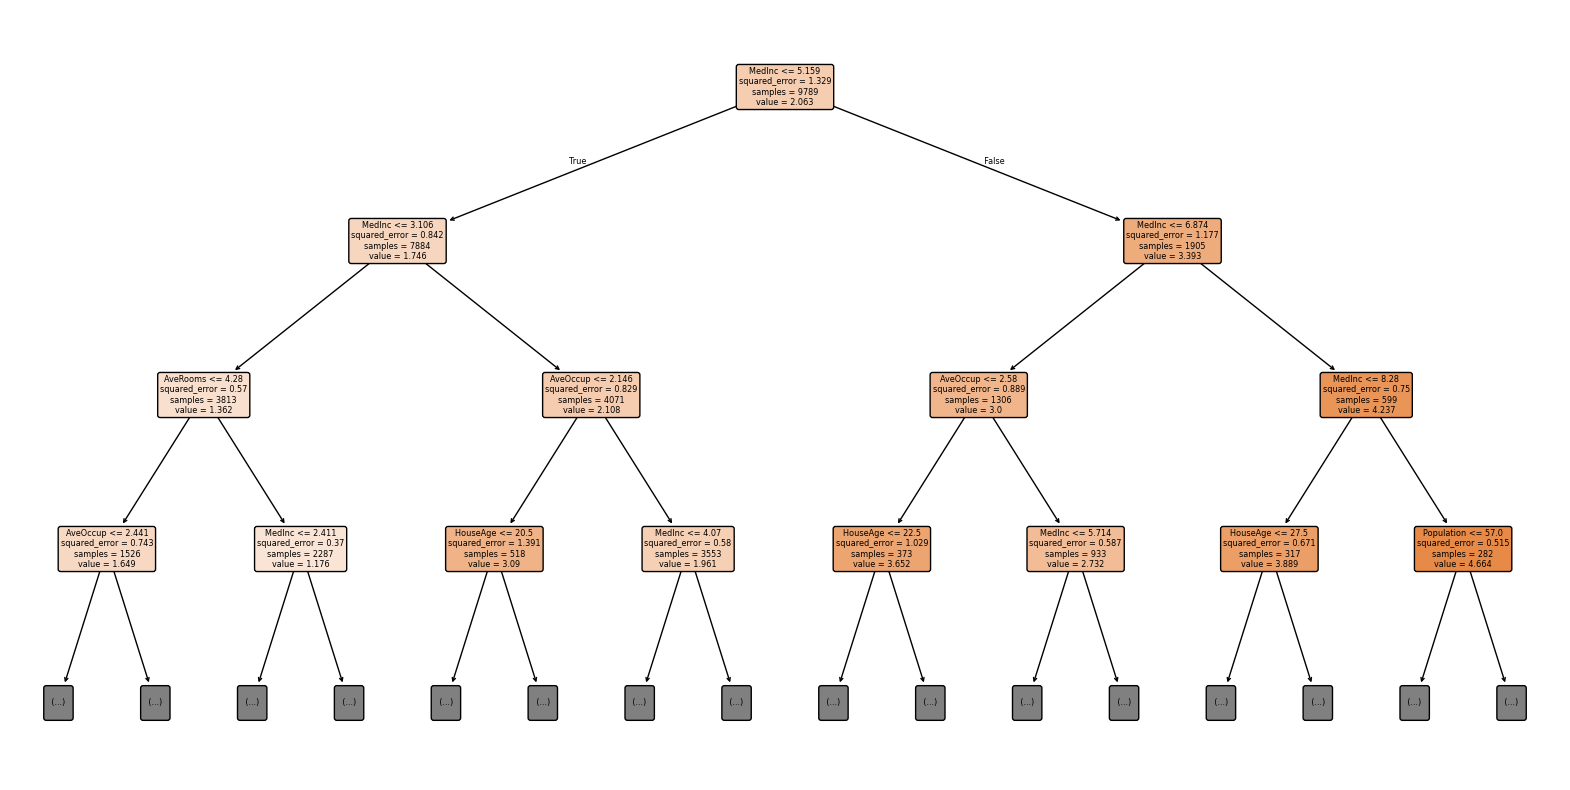

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get a single tree from the forest (e.g., the first one)
tree_to_plot = rf.estimators_[0]

# Create a figure with larger size
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(tree_to_plot, 
          feature_names=cal_housing.feature_names,
          filled=True, 
          rounded=True,
          max_depth=3)  # Limiting depth for visibility

plt.show()


Reason Are there any machine learning models that outperform Random Forest on predicting Price for the from sklearn.datasets import fetch_california_housing dataset?

Yes. Models such as Gradient Boosted Decision Trees (e.g. XGBoost, LightGBM, or CatBoost) often outperform Random Forest on the California Housing dataset (and many other structured tabular problems) due to their more sophisticated boosting strategy and ability to reduce bias effectively.

Why Gradient Boosting Tends to Outperform Random Forest
Boosting vs. Bagging

Random Forest uses a bagging approach: it trains multiple decision trees in parallel on different bootstrap samples of the training data, then averages the predictions.
Gradient boosting (e.g. XGBoost, LightGBM, CatBoost) sequentially trains new trees that specifically target the previous trees’ residual errors. By iteratively reducing the residuals, the model typically converges to lower bias compared to a bagged ensemble.
Fine-Grained Optimization

In gradient boosting, each newly added tree is fit on the gradient (partial derivative) of the loss function with respect to the predictions. This allows the model to attack what it has not yet learned with finer granularity.
Random Forest, meanwhile, is more coarse in that each tree trains independently on bootstrapped data. Once a tree is built, it is not refined further.
Hyperparameter Tuning

While both models require hyperparameter tuning for best performance (e.g., number of estimators, max depth), gradient boosting frameworks offer additional knobs (learning rate, L1/L2 regularization, subsampling ratio, etc.) that can help avoid overfitting and further enhance performance.
These extra hyperparameters allow practitioners to fine-tune the model to a higher degree than Random Forest.
Built-In Handling of Complex Interactions

Structured tabular data often contains non-linear interactions and complex relationships that can be captured by ensembles of decision trees. Gradient boosting’s iterative approach can identify and emphasize these interactions more efficiently than a simple ensemble of independently trained trees.

In [5]:

# Perform feature engineering: 
# 1) Polynomial terms (e.g., squares of MedInc and HouseAge, and interaction between them)
# 2) Distance to Los Angeles (naive lat-lon distance)

# Calculate distance to LA (approx. lat=34.05, lon=-118.24)
dist_to_la = ((X[:, 6] - 34.05)**2 + (X[:, 7] + 118.24)**2)**0.5

# Create polynomial and interaction terms (simple example)
medinc_sq = X[:, 0]**2
houseage_sq = X[:, 1]**2
medinc_houseage = X[:, 0] * X[:, 1]

# Combine original features with new features
import math  # If 'math' is already available, this is fine; otherwise ignore
import numpy as np  # If 'numpy' is already available, this is fine; otherwise ignore
X_fe = np.column_stack([X, medinc_sq, houseage_sq, medinc_houseage, dist_to_la])

# Split the new feature set
X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y, random_state=42)

# Build and train another Random Forest model with new features
rf_fe = RandomForestRegressor(n_estimators=200, random_state=42)
rf_fe.fit(X_fe_train, y_fe_train)

# Evaluate the new model
r2_score_fe = rf_fe.score(X_fe_test, y_fe_test)
print("Enhanced Random Forest R^2:", r2_score_fe)




Enhanced Random Forest R^2: 0.812476025723741


In [7]:
%pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit XGBoost
model_xgb = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_xgb.fit(X_train, y_train)

# Evaluate
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse_xgb:.4f}")


XGBoost MSE: 0.2219


In [9]:
#calculate r2 score
r2_score_xgb = model_xgb.score(X_test, y_test)
print(f"XGBoost R^2: {r2_score_xgb:.4f}")


XGBoost R^2: 0.8306


In [10]:
#Use X_fe to train and test XGBoost
X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y, random_state=42)

model_xgb_fe = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_xgb_fe.fit(X_fe_train, y_fe_train)

#evaluate the new model
y_fe_pred = model_xgb_fe.predict(X_fe_test)
mse_xgb_fe = mean_squared_error(y_fe_test, y_fe_pred)
print(f"XGBoost with Feature Engineering MSE: {mse_xgb_fe:.4f}")

#calculate r2 score
r2_score_xgb_fe = model_xgb_fe.score(X_fe_test, y_fe_test)
print(f"XGBoost with Feature Engineering R^2: {r2_score_xgb_fe:.4f}")




XGBoost with Feature Engineering MSE: 0.2196
XGBoost with Feature Engineering R^2: 0.8341
